#TASK 4.10 (Part 1)

Step 1 -Importing Libraries and data set

In [1]:
# Import liabraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Project folder path as a string
path = r'/Users/Nimrat/Documents/Instacart Basket Analysis'

In [3]:
#Import the “ords_prods_custs_merge” data set into your notebook using the os library
df_ords_prods_custs_merge = pd.read_pickle(os.path.join(path, 'Prepared data', 'ords_prods_custs_merged.pkl'))

In [4]:
#Checking output
df_ords_prods_custs_merge.shape

(32404859, 33)

Step 2 - Data Security Considerations 

In [5]:
#Checking columns that contains PII data
df_ords_prods_custs_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'order_regularity_median',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependents', 'fam_status', 'income'],
      dtype='object')

The data set contains personal or sensitive information such as first_name, last_name, gender, fam_status of customers.
Fields such as first_name and last_name identifies a person directly. We can drop these columns and use user_id to identify customers.

In [6]:
#Dropping columns that contain PII
df_ords_prods_custs_merge.drop(columns = ['first_name', 'last_name'],axis = 1, inplace = True)

In [7]:
#Checking the output
df_ords_prods_custs_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'order_regularity_median',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependents', 'fam_status', 'income'],
      dtype='object')

In [8]:
#Checking the shape of the dataframe
df_ords_prods_custs_merge.shape

(32404859, 31)

Step 3a) Create a 'region' column based on US Census regions

In [9]:
#Define regions as dictonaries/lists
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
#Function to assign region
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

In [11]:
# Create new Region column
df_ords_prods_custs_merge['region'] = df_ords_prods_custs_merge['state'].apply(assign_region)

In [12]:
#Checking the output
df_ords_prods_custs_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity_median,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest


In [13]:
#Checking the shape of the dataframe
df_ords_prods_custs_merge.shape

(32404859, 32)

Step 3b) Determine whether there’s a difference in spending habits between the different U.S. regions.

In [14]:
#Creating a crosstab of the region and speding flag columns to see how speding differs across US regions
df_crosstab = pd.crosstab(df_ords_prods_custs_merge['region'], df_ords_prods_custs_merge['spending_flag'], dropna = False)

In [15]:
#Checking the output
df_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


The South has the highest number of both high and low spenders. This suggests that the South has the largest active customer base. The West also has a strong customer base with a high count of both high and low spenders but slightly lower than the South. The Midwest and Northeast show smaller but still meaningful levels of customer activity.

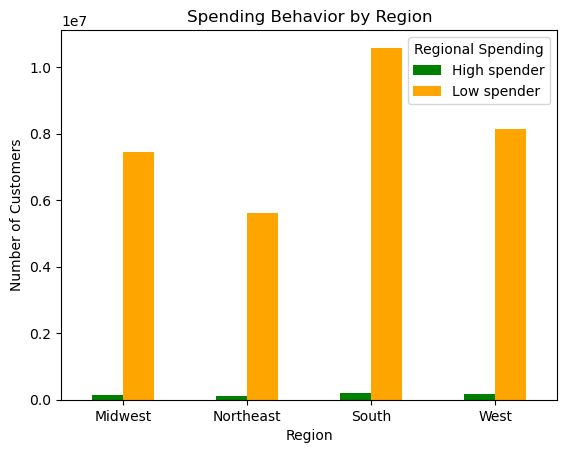

In [16]:
#Creating bar chart to visualize crosstab
bar_reg_spending = df_crosstab.plot(kind='bar', color=['green', 'orange'])

plt.title('Spending Behavior by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)   # keep region labels horizontal
plt.legend(title='Regional Spending')
plt.show()

In [17]:
#Exporting bar chart
bar_reg_spending.figure.savefig(os.path.join(path, 'Visualizations', 'bar_regional_spending.png'))

Step 4 - Create an exclusion flag for low-activity customers.

In [18]:
#Creating an exclusion flag column based on max order
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['max_order'] < 5, 'customer_activity'] = 'low'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['max_order'] >= 5, 'customer_activity'] = 'high'

In [19]:
#Checking the output
df_ords_prods_custs_merge['customer_activity'].value_counts(dropna = False)

customer_activity
high    30964564
low      1440295
Name: count, dtype: int64

In [20]:
#Creating a new dataframe for low-activity customers.
df_low_act_custs = df_ords_prods_custs_merge[df_ords_prods_custs_merge['customer_activity']=='low']

In [21]:
#Checking the output
df_low_act_custs.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,customer_activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,low
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,low
34,1,Chocolate Sandwich Cookies,61,19,5.8,2434812,1598,1,2,12,...,Frequent customer,Male,Kansas,41,1/7/2018,2,married,122060,Midwest,low
35,1,Chocolate Sandwich Cookies,61,19,5.8,1531889,1598,2,2,10,...,Frequent customer,Male,Kansas,41,1/7/2018,2,married,122060,Midwest,low
36,1,Chocolate Sandwich Cookies,61,19,5.8,726947,1598,3,4,17,...,Frequent customer,Male,Kansas,41,1/7/2018,2,married,122060,Midwest,low


In [22]:
df_low_act_custs.shape

(1440295, 33)

In [23]:
#Exporting the subset of low-activity customers
df_low_act_custs.to_pickle(os.path.join(path, 'Prepared Data', 'low_activity_customers.pkl'))

Exclude low activity customers from the data

In [24]:
#Checking dataframe before excluding
df_ords_prods_custs_merge.shape

(32404859, 33)

In [25]:
#Creating new dataframe with high activity customers
df_high_act_custs = df_ords_prods_custs_merge[df_ords_prods_custs_merge['customer_activity']=='high']

In [26]:
#Checking the output
df_high_act_custs.shape

(30964564, 33)

In [27]:
df_high_act_custs.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,high
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,high
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,high


Step 5 & 6 - Create a profiling variable and visulaizations

Age Profile

In [28]:
#Divinding ages into categories
df_high_act_custs.loc[df_high_act_custs['age'] <= 33, 'age_category'] = 'Young adult'
df_high_act_custs.loc[(df_high_act_custs['age'] > 33) & ( df_high_act_custs ['age'] < 65), 'age_category'] = 'Middle-aged adult'
df_high_act_custs.loc[df_high_act_custs['age'] >= 65, 'age_category'] = 'Senior'

/var/folders/yp/kt4_7p6531xbn6mhwvqy8y740000gp/T/ipykernel_23638/1098713758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_act_custs.loc[df_high_act_custs['age'] <= 33, 'age_category'] = 'Young adult'


In [29]:
#Checking the output
df_high_act_custs['age_category'].value_counts(dropna = False)

age_category
Middle-aged adult    15011555
Senior                8195544
Young adult           7757465
Name: count, dtype: int64

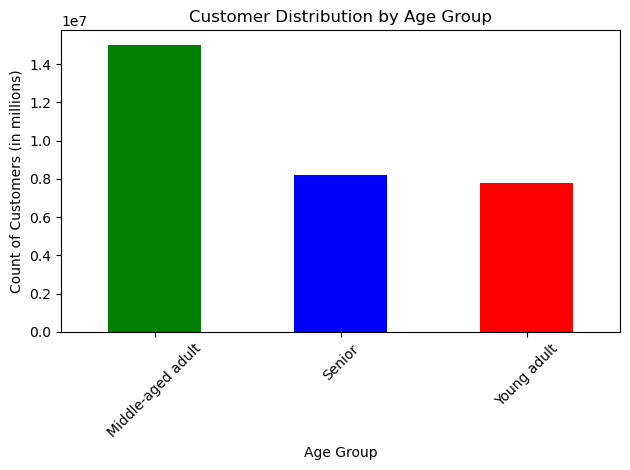

In [30]:
#Creating a bar chart
bar_cust_age = df_high_act_custs['age_category'].value_counts().plot(kind = 'bar', color = ['green', 'blue', 'red'])

plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Count of Customers (in millions)')
plt.tight_layout()

The bar chart shows how many customers fall into each age category. Middle-aged adults make up the largest group. Seniors are the second largest group, Young adults form the smallest group.

In [31]:
# Exporting bar chart.

bar_cust_age.figure.savefig(os.path.join(path, 'Visualizations', 'bar_customer_age.png'))

Customers fall into order frequency category

In [32]:
#Finding distibution of order frequency
df_high_act_custs['order_frequency_flag'].value_counts(dropna = False)

order_frequency_flag
Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: count, dtype: int64

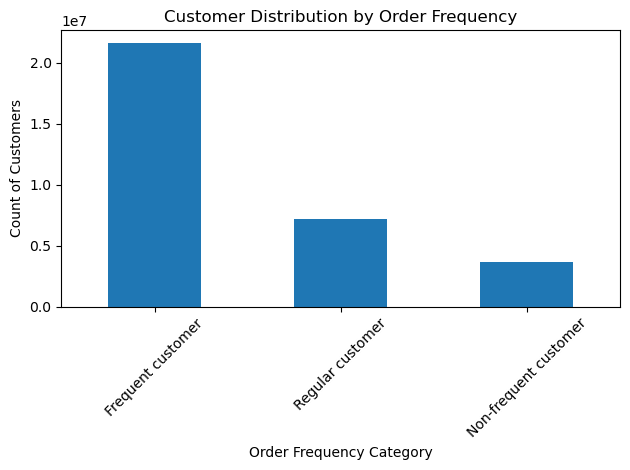

In [33]:
#Creating bar chart for order frequency flag
bar_frequency = df_ords_prods_custs_merge['order_frequency_flag'].value_counts().plot.bar()
plt.title('Customer Distribution by Order Frequency')
plt.xlabel('Order Frequency Category')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart shows how often customers place orders. Frequent customers make up the largest group by far, with over 21 million customers. Regular customers are the next biggest group, with around 7 million customers. Non-frequent customers are the smallest group, with about 3.7 million.

In [34]:
#Exporting bar chart
bar_frequency.figure.savefig(os.path.join(path, 'Visualizations', 'bar_order_frequency.png'))

Average income by region

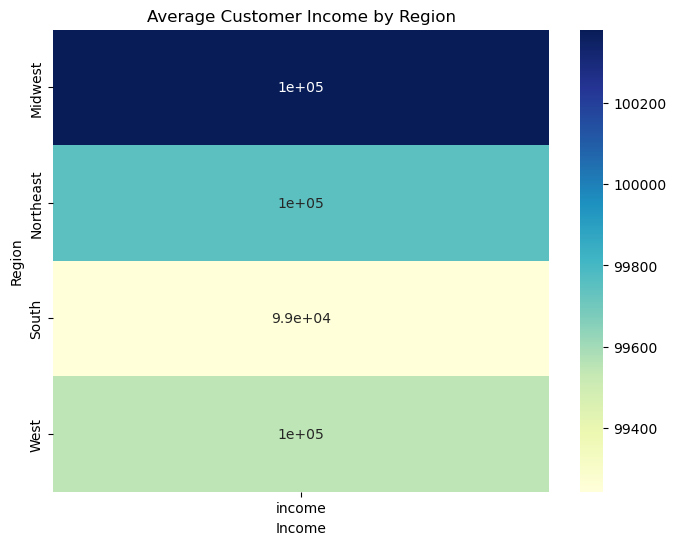

In [35]:
#Creating a heatmap for average income by region
region_income = df_high_act_custs.pivot_table(index='region', values='income', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(region_income, annot=True, cmap="YlGnBu")
plt.title("Average Customer Income by Region")
plt.xlabel("Income")
plt.ylabel("Region")
plt.show()

The heatmap shows the average customer income across different U.S. regions. Midwest has the highest average income, slightly above 102,000. Northeast and West regions have moderate average income close to 99,500 to 100,000. South has the  lowest average income which is just under 99,000. 


In [36]:
#Exporting heatmap
plt.savefig(os.path.join(path, 'Visualizations', 'average_income_region.png'))

<Figure size 640x480 with 0 Axes>

Customer orders acroos the week

In [37]:
#Labeling days instead of numbers
day_map = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}

/var/folders/yp/kt4_7p6531xbn6mhwvqy8y740000gp/T/ipykernel_23638/1204316362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_ord_week = df_high_act_custs['orders_day_name'] = df_high_act_custs['orders_day_of_week'].map(day_map)


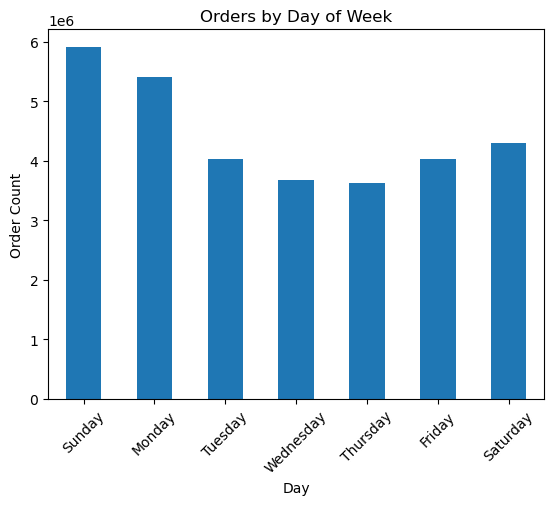

In [38]:
#Creating a chart based on order day of week
bar_ord_week = df_high_act_custs['orders_day_name'] = df_high_act_custs['orders_day_of_week'].map(day_map)

df_high_act_custs['orders_day_name'].value_counts().loc[day_map.values()].plot(kind='bar')

plt.title("Orders by Day of Week")
plt.xlabel("Day")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()

The chart shows how many Instacart orders are placed on each day of the week. Sunday has the highest number of orders, showing it’s the busiest day of the week for Instacart. Monday is also very busy, with the second-highest order count. Tuesday, Wednesday, and Thursday are noticeably quieter, showing mid-week dips in customer activity. Friday and Saturday show moderate order volumes, higher than mid-week but lower than Sunday and Monday.

In [39]:
#Exporting the bar chart
plt.savefig(os.path.join(path, 'Visualizations', 'bar_orders_by_week.png'))

<Figure size 640x480 with 0 Axes>

Step 7 - Aggregate the max, mean, and min variables on a customer-profile level

In [40]:
#Choose customer profile 
profile_fields = ['gender', 'age', 'spending_flag']

In [41]:
# Aggregating usage frequency + expenditure
customer_profile_summary = df_high_act_custs.groupby(profile_fields).agg({
    'order_number': ['max', 'min', 'mean'],      # usage frequency
    'avg_product_price': ['max', 'min', 'mean'], # expenditure
    'prices': ['max', 'min', 'mean']             # expenditure
})

In [42]:
#Checking the output
customer_profile_summary

order_number                avg_product_price  \
                                  max min       mean               max   
gender age spending_flag                                                 
Female 18  High spender            87   1  18.308537       1717.904274   
           Low spender             99   1  17.302054          9.928571   
       19  High spender            99   1  27.380381        458.187879   
           Low spender             99   1  17.994489          9.932432   
       20  High spender            92   1  25.042879       5668.766038   
...                               ...  ..        ...               ...   
Male   79  Low spender             99   1  17.437361          9.977857   
       80  High spender            99   1  21.203944       1396.451389   
           Low spender             99   1  18.402564          9.985714   
       81  High spender            99   1  24.607811        951.885849   
           Low spender             99   1  17.560122          9.926667   

                                                  prices                   
                                min        mean      max  min        mean  
gender age spending_flag                                                   
Female 18  High spender   10.018182  304.308811  99999.0  1.1  304.308811  
           Low spender     3.542857    7.744770     25.0  1.0    7.744770  
       19  High spender   10.019403  114.175523  14900.0  1.0  114.175523  
           Low spender     3.078571    7.804616     25.0  1.0    7.804616  
       20  High spender   10.050575  198.400524  99999.0  1.0  198.400524  
...                             ...         ...      ...  ...         ...  
Male   79  Low spender     3.457143    7.787898     25.0  1.0    7.787898  
       80  High spender   10.000000  154.185354  99999.0  1.0  154.185354  
           Low spender     2.145763    7.783915     25.0  1.0    7.783915  
       81  High spender   10.023404  101.402082  99999.0  1.0  101.402082  
           Low spender     2.766667    7.794516     25.0  1.0    7.794516  

[256 rows x 9 columns]

Step 8 - Compare your customer profiles

In [43]:
#Create a crosstab
crosstab = pd.crosstab(df_high_act_custs['region'], df_high_act_custs['spending_flag'])

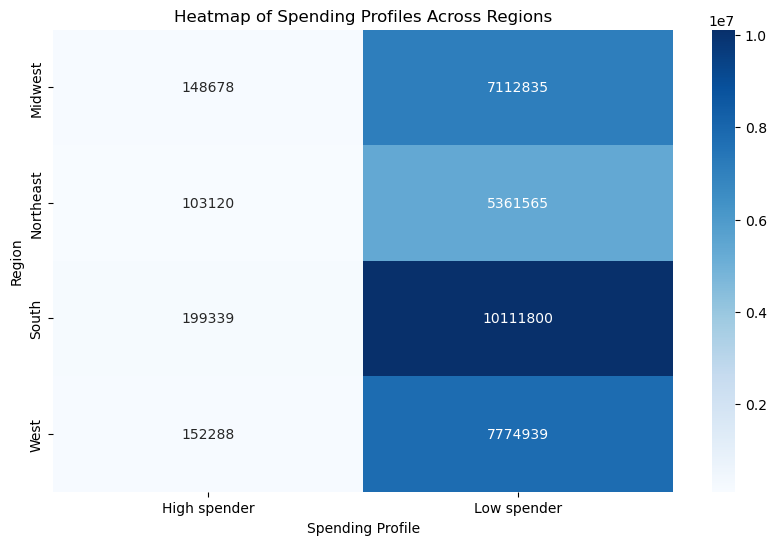

In [44]:
#Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of Spending Profiles Across Regions")
plt.ylabel("Region")
plt.xlabel("Spending Profile")
plt.show()

The heatmap compares High Spenders vs. Low Spenders across the Midwest, Northeast, South, and West regions. South has the highest number of Low spenders (10,111,800) and also the highest number of High spenders (199,339). This means the South has the largest overall customer base. West has 7,774,939 Low spenders and 152,288 High spenders, making it the second-largest region. Midwest has 7,112,835 Low spenders and 148,678 High spenders, very similar to the West. Northeast has the fewest customers overall, with 5,361,565 Low spenders and 103,120 High spenders.

In [45]:
#Exporting heatmap
plt.savefig(os.path.join(path, 'Visualizations', 'spending_across_region'))

<Figure size 640x480 with 0 Axes>

In [46]:
#Checking the final dataframe
df_high_act_custs.shape

(30964564, 35)

In [47]:
#Exporting final dataframe
df_high_act_custs.to_pickle(os.path.join(path, 'Prepared Data', 'data_final_analysis.pkl'))